In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [4]:
from sklearn.datasets import load_diabetes, load_wine

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [5]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
print(df.columns)
df.head()
df.shape

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


(178, 14)

In [8]:
features = df.columns[0:12] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

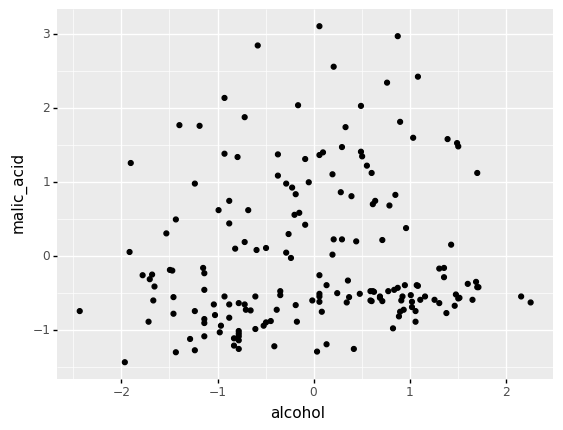

<ggplot: (82008886691)>

In [10]:
ggplot(df, aes(x = "alcohol", y = "malic_acid")) + geom_point()

In [22]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_
#len(pca.explained_variance_ratio_)

array([0.36632969, 0.18127473, 0.11829747, 0.07398949, 0.06798447,
       0.05266292, 0.04565687, 0.0288938 , 0.02162794, 0.02053873,
       0.01412537, 0.00861851])

In [23]:
pcaDF = pd.DataFrame({"pc": range(1,13),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.366330,0.366330
1,2,0.181275,0.547604
2,3,0.118297,0.665902
3,4,0.073989,0.739891
4,5,0.067984,0.807876


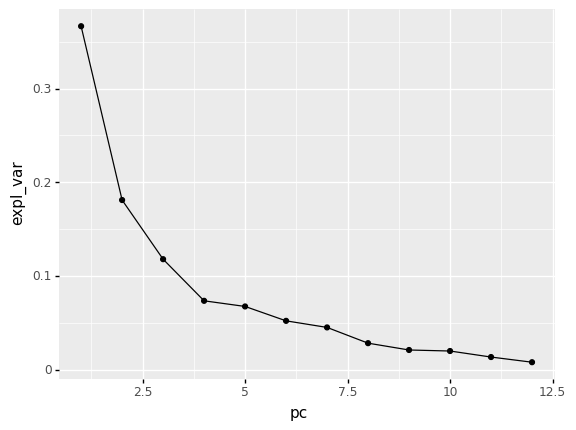

<ggplot: (82013478792)>

In [27]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

In [31]:
pcaDF

,pc,expl_var,cum_var
0,1,0.366330,0.366330
1,2,0.181275,0.547604
2,3,0.118297,0.665902
3,4,0.073989,0.739891
4,5,0.067984,0.807876
5,6,0.052663,0.860539
6,7,0.045657,0.906196
7,8,0.028894,0.935089
8,9,0.021628,0.956717
9,10,0.020539,0.977256


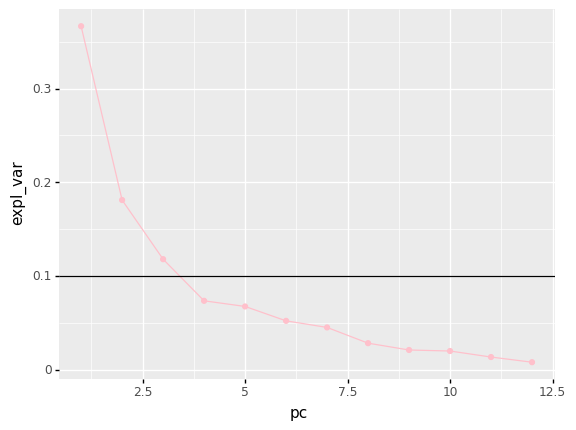

<ggplot: (82013978477)>

In [37]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.1))

In [35]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])


df10 = pd.DataFrame(data[:, 0:10])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))

#modeMod1
lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))

all data:  1.0
10 PCs:    1.0
4 PCs:     0.9438202247191011
